In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

# models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC




# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score


import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
pwd

'C:\\Users\\User\\Documents\\Poonam\\DataScience\\Capstone_project\\Project_2\\Healthcare - Diabetes'

In [3]:
df = pd.read_csv('health care diabetes.csv')

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### DATA SHAPE: Data has 768 rows and 9 columns 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
df.groupby(['Outcome']).mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [8]:
df.groupby(['Outcome']).median()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,2.0,107.0,70.0,21.0,39.0,30.05,0.336,27.0
1,4.0,140.0,74.0,27.0,0.0,34.25,0.449,36.0


In [9]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## This data has no null values

In [10]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [11]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [12]:
Nondiabetic_patients = df.Outcome == 0
Diabetic_patients = df.Outcome == 1

In [13]:
print('Non-diabetic patients', Nondiabetic_patients.sum()/df.Outcome.shape[0]*100)
print('diabetic patients', Diabetic_patients.sum()/df.Outcome.shape[0]*100)

Non-diabetic patients 65.10416666666666
diabetic patients 34.89583333333333


### The data has nearly 35% of patients that are diabetic  

In [14]:
dup_rows = df[df.duplicated()]

In [15]:
dup_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [16]:
df.skew()

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64

In [17]:
# df.iloc[(df.groupby('Outcome')), df['Glucose']==0]

In [18]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


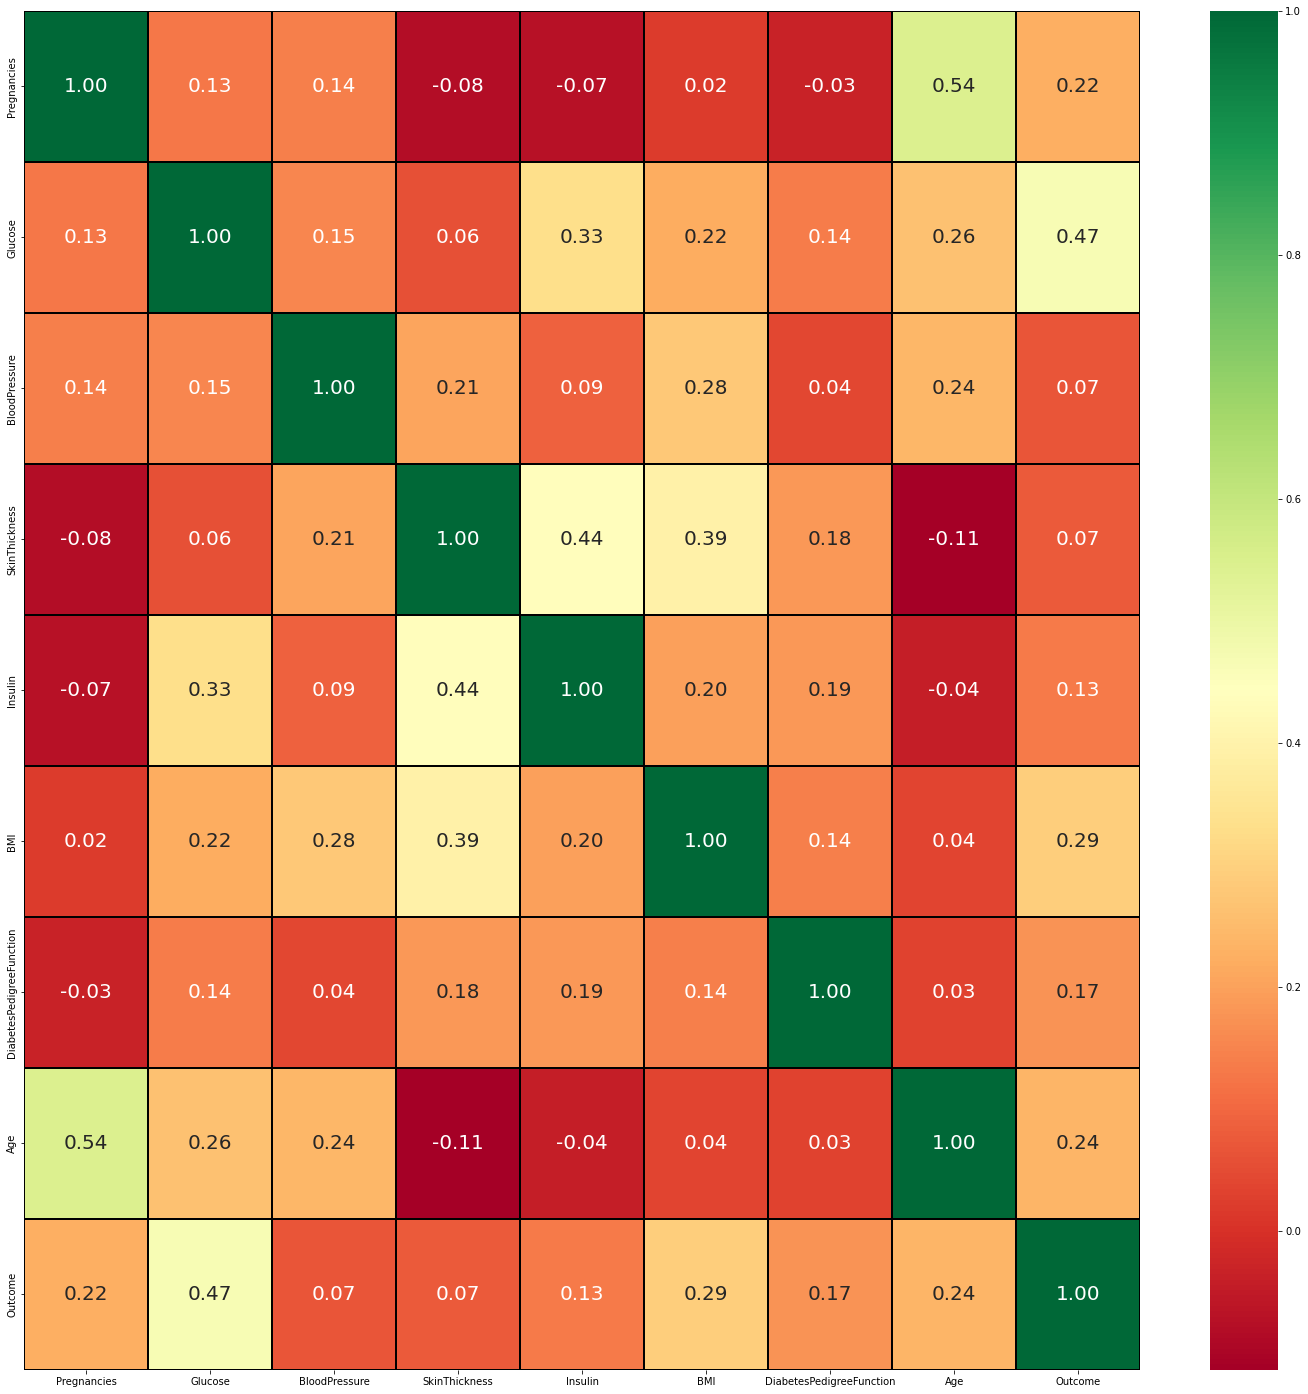

In [19]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(),annot = True, annot_kws= {'size' : 20},
           cmap = "RdYlGn", fmt = '.2f', linewidths = 2, linecolor = 'black')
plt.show()

## The raw data shows that target variable 'Outcome' is highly correlated with glucose and moderately correlated with BMI and Age. 

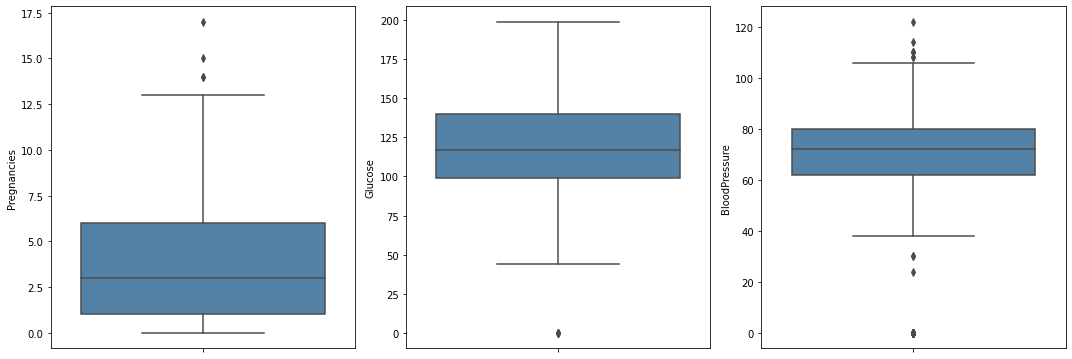

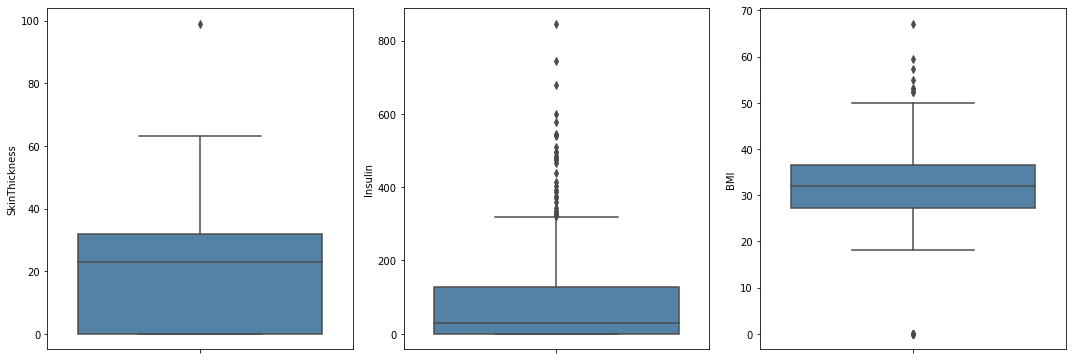

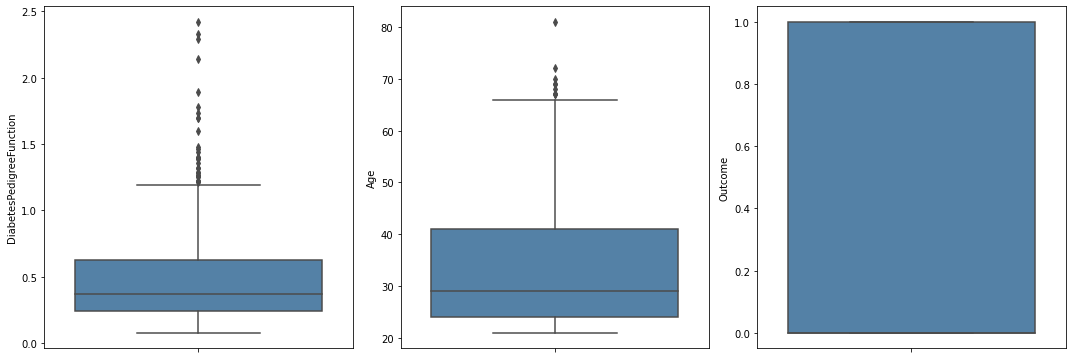

<Figure size 1080x720 with 0 Axes>

In [20]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df.columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.boxplot(y=df[c], ax=ax2, color='steelblue') #for boxplot
        fig.tight_layout()
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

## The variables 'insulin' and 'Diabetespedigreefunction' show many outliers.

<AxesSubplot:xlabel='Outcome', ylabel='count'>

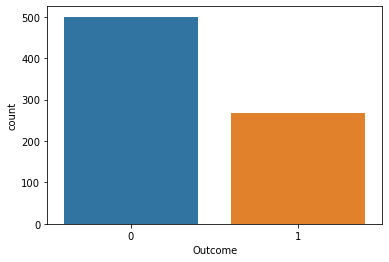

In [21]:
sns.countplot(df.Outcome)

In [22]:
df[df['Glucose']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


<AxesSubplot:xlabel='Glucose', ylabel='Density'>

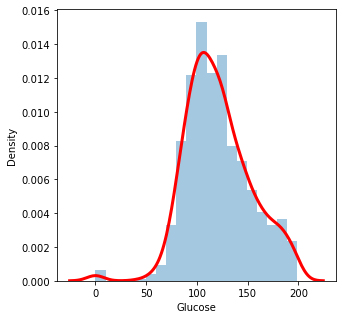

In [23]:
plt.figure(figsize=(5,5))
sns.distplot(df['Glucose'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})

In [24]:
df[df['BloodPressure']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

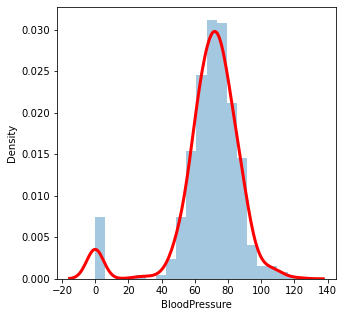

In [25]:
plt.figure(figsize=(5,5))
sns.distplot(df['BloodPressure'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})

In [26]:
df[df['SkinThickness']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
9,8,125,96,0,0,0.0,0.232,54,1
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
757,0,123,72,0,0,36.3,0.258,52,1
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
762,9,89,62,0,0,22.5,0.142,33,0


<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

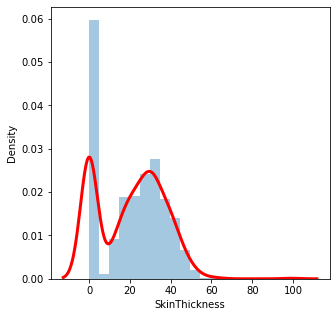

In [27]:
plt.figure(figsize=(5,5))
sns.distplot(df['SkinThickness'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})

In [28]:
df[df['Insulin']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
...,...,...,...,...,...,...,...,...,...
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
764,2,122,70,27,0,36.8,0.340,27,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

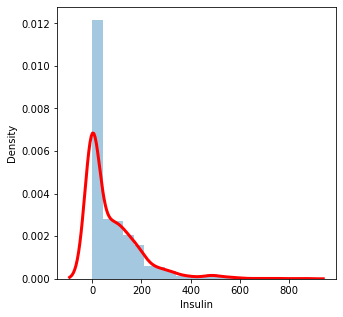

In [29]:
plt.figure(figsize=(5,5))
sns.distplot(df['Insulin'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})

In [30]:
df[df['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


<AxesSubplot:xlabel='BMI', ylabel='Density'>

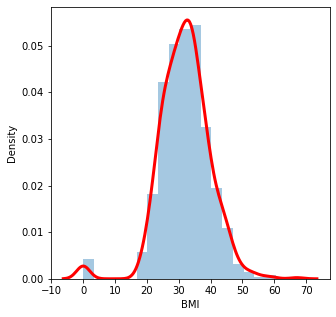

In [31]:
plt.figure(figsize=(5,5))
sns.distplot(df['BMI'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})

In [32]:
zero_list = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [33]:
zero_list

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [34]:
def find_zeros(df):
    for i in zero_list:
        print('----',i,'----')
        display(df[df[i]==0].groupby('Outcome').size())
        print()

In [35]:
find_zeros(df)

---- Glucose ----


Outcome
0    3
1    2
dtype: int64


---- BloodPressure ----


Outcome
0    19
1    16
dtype: int64


---- SkinThickness ----


Outcome
0    139
1     88
dtype: int64


---- Insulin ----


Outcome
0    236
1    138
dtype: int64


---- BMI ----


Outcome
0    9
1    2
dtype: int64

In [36]:
def treat_zeros(df):
    for i in zero_list:
        df.loc[(df[i]==0) & (df.Outcome ==1), i] = df[(df[i] !=0) & (df.Outcome == 1)][i].mean()
        df.loc[(df[i]==0) & (df.Outcome ==0), i] = df[(df[i] !=0) & (df.Outcome == 0)][i].mean()

In [37]:
treat_zeros(df)

In [38]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0


In [39]:
zero_list

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [40]:
print(df[zero_list]==0)

     Glucose  BloodPressure  SkinThickness  Insulin    BMI
0      False          False          False    False  False
1      False          False          False    False  False
2      False          False          False    False  False
3      False          False          False    False  False
4      False          False          False    False  False
..       ...            ...            ...      ...    ...
763    False          False          False    False  False
764    False          False          False    False  False
765    False          False          False    False  False
766    False          False          False    False  False
767    False          False          False    False  False

[768 rows x 5 columns]


In [41]:
df[zero_list]

,Glucose,BloodPressure,SkinThickness,Insulin,BMI
0,148.0,72.0,35.0,206.846154,33.6
1,85.0,66.0,29.0,130.287879,26.6
2,183.0,64.0,33.0,206.846154,23.3
3,89.0,66.0,23.0,94.000000,28.1
4,137.0,40.0,35.0,168.000000,43.1
...,...,...,...,...,...
763,101.0,76.0,48.0,180.000000,32.9
764,122.0,70.0,27.0,130.287879,36.8
765,121.0,72.0,23.0,112.000000,26.2
766,126.0,60.0,33.0,206.846154,30.1


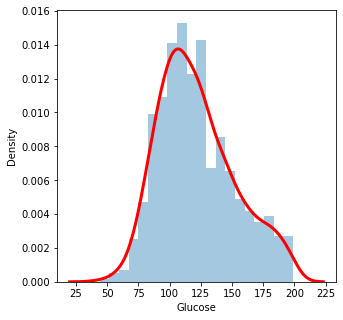

In [42]:
plt.figure(figsize=(5,5))
sns.distplot(df['Glucose'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})
plt.show()

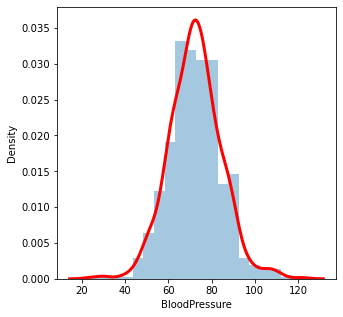

In [43]:
plt.figure(figsize=(5,5))
sns.distplot(df['BloodPressure'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})
plt.show()

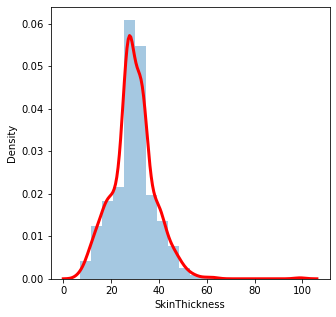

In [44]:
plt.figure(figsize=(5,5))
sns.distplot(df['SkinThickness'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})
plt.show()

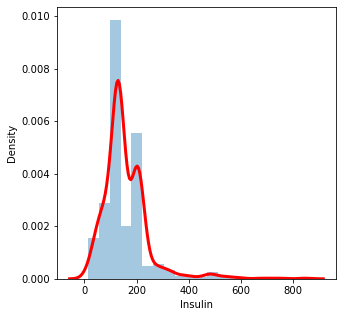

In [45]:
plt.figure(figsize=(5,5))
sns.distplot(df['Insulin'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})
plt.show()

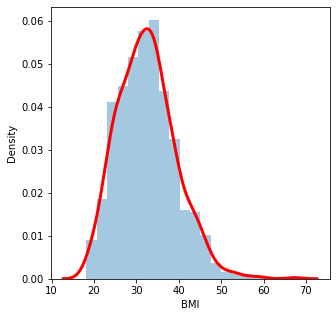

In [46]:
plt.figure(figsize=(5,5))
sns.distplot(df['BMI'], bins=20, kde_kws={'linewidth': 3, 'color': 'red'})
plt.show()

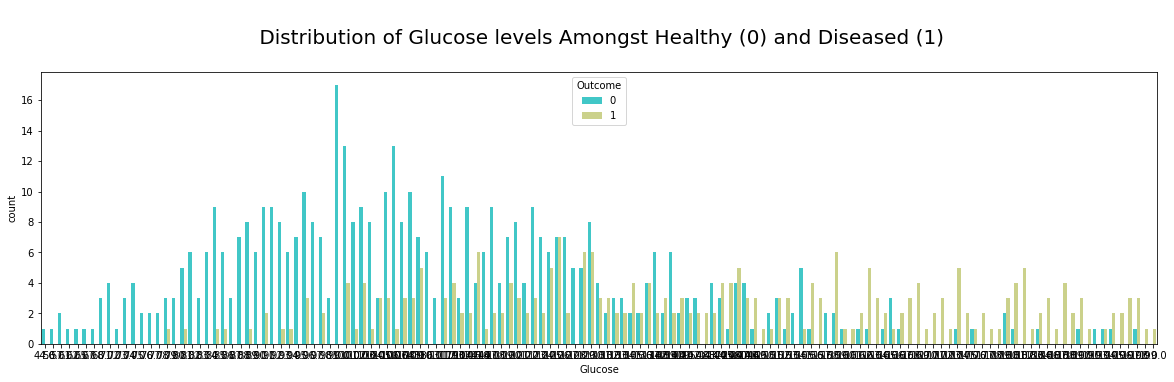

In [47]:
plt.figure(figsize = (20,5))
sns.countplot(df.Glucose, hue = df.Outcome, palette='rainbow')
plt.title('\n Distribution of Glucose levels Amongst Healthy (0) and Diseased (1)\n', fontsize = 20)
plt.show()

## The graph clearly shows that glucose levels are higher among patients who have diabetes

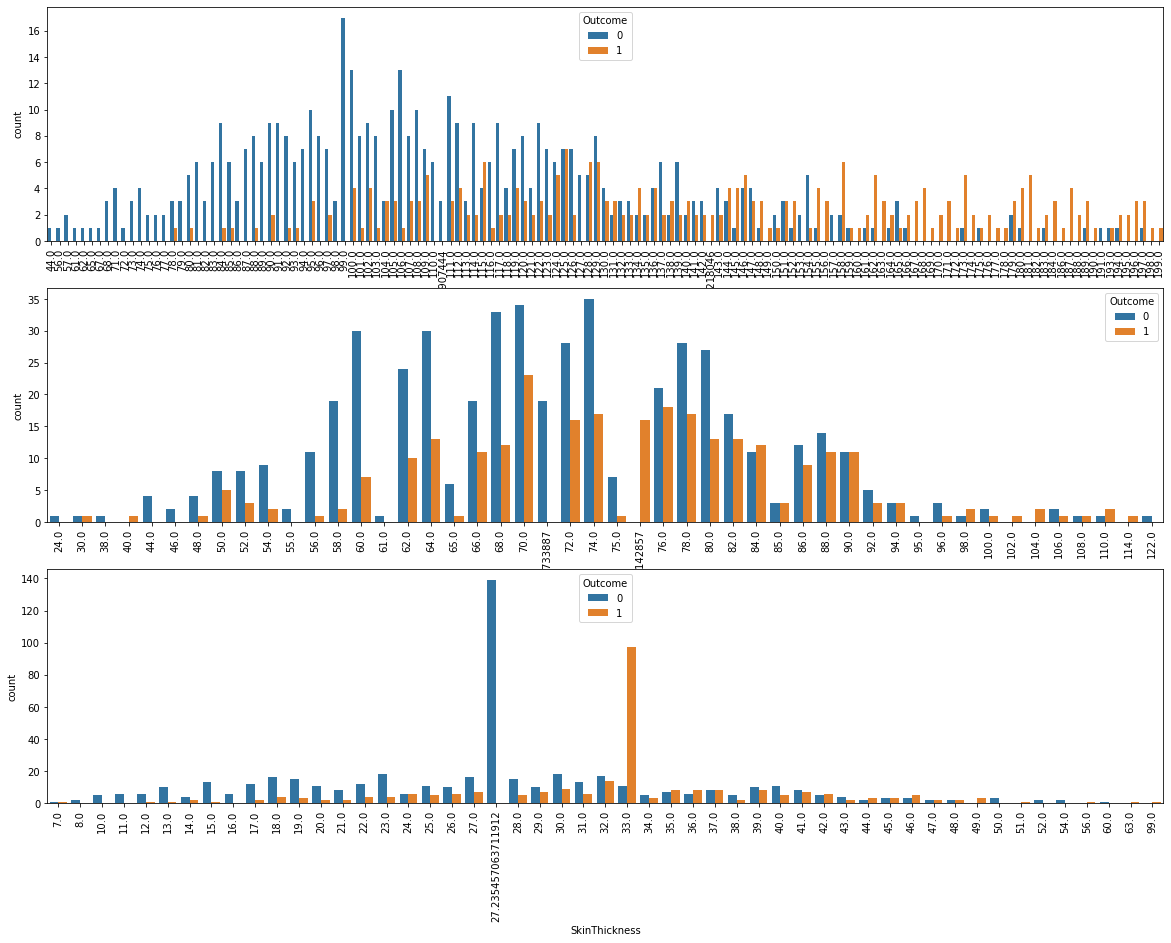

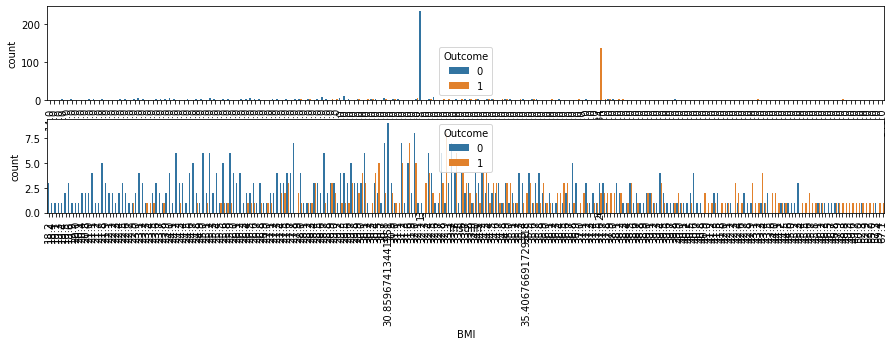

In [48]:
ix = 1
fig = plt.figure(figsize = (20,25))
for c in list(zero_list):
    if ix <= 3:
        ax2 = fig.add_subplot(5,1,ix+1)
        ax2.tick_params(axis='x', labelrotation=90)
        sns.countplot(data=df[zero_list], x=df[zero_list][c], hue=df['Outcome'], ax=ax2) #for boxplot
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [49]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [50]:
def find_outlier(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    IQR = q3-q1
    lower_limit = q1-1.5*IQR
    upper_limit = q3+1.5*IQR
    return lower_limit,upper_limit

In [51]:
find_outlier(df, 'Pregnancies')

(-6.5, 13.5)

In [52]:
find_outlier(df, 'Glucose')

(37.875, 202.875)

In [53]:
find_outlier(df, 'Insulin')

(-6.519230769230774, 334.86538461538464)

In [54]:
zero_list

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [55]:
def treat_outlier(df):
    for i in zero_list:
        lower, upper = find_outlier(df, i)
        df.loc[df[i] < lower, i] = lower
        df.loc[df[i] > upper, i] = upper 

In [56]:
treat_outlier(df)

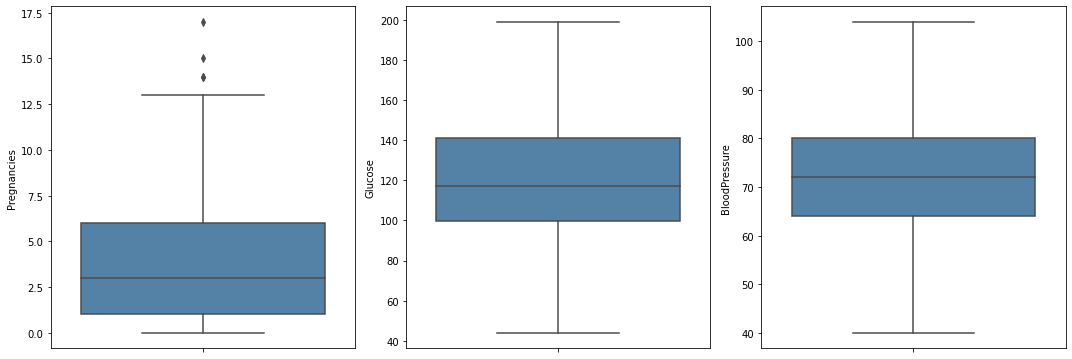

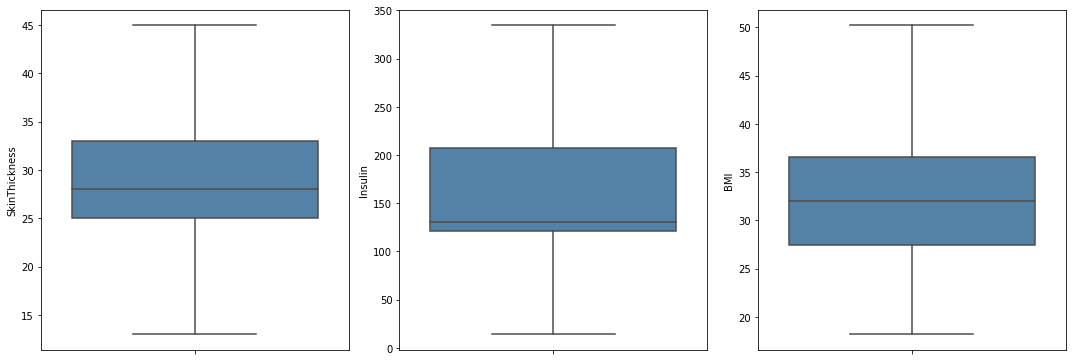

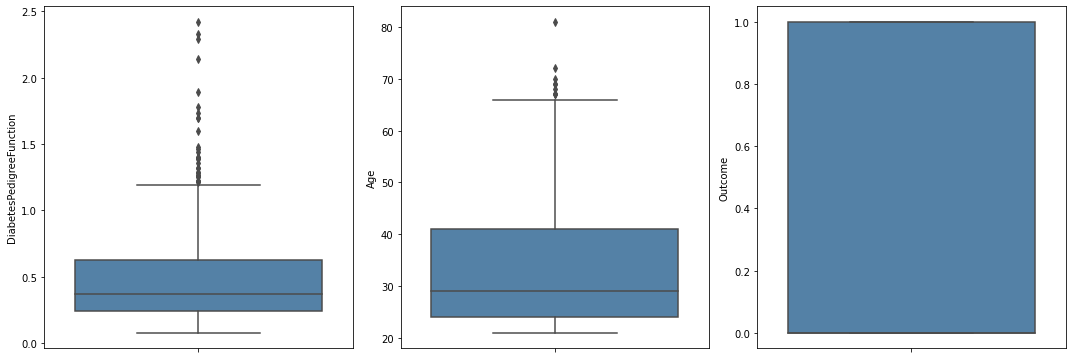

<Figure size 1080x720 with 0 Axes>

In [57]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(df.columns):
    if ix <= 3:
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.boxplot(y=df[c], ax=ax2, color='steelblue') #for boxplot
        fig.tight_layout()
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

In [58]:
df_cleaned = df.copy()

In [59]:
df_cleaned.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0


## Pair Plot

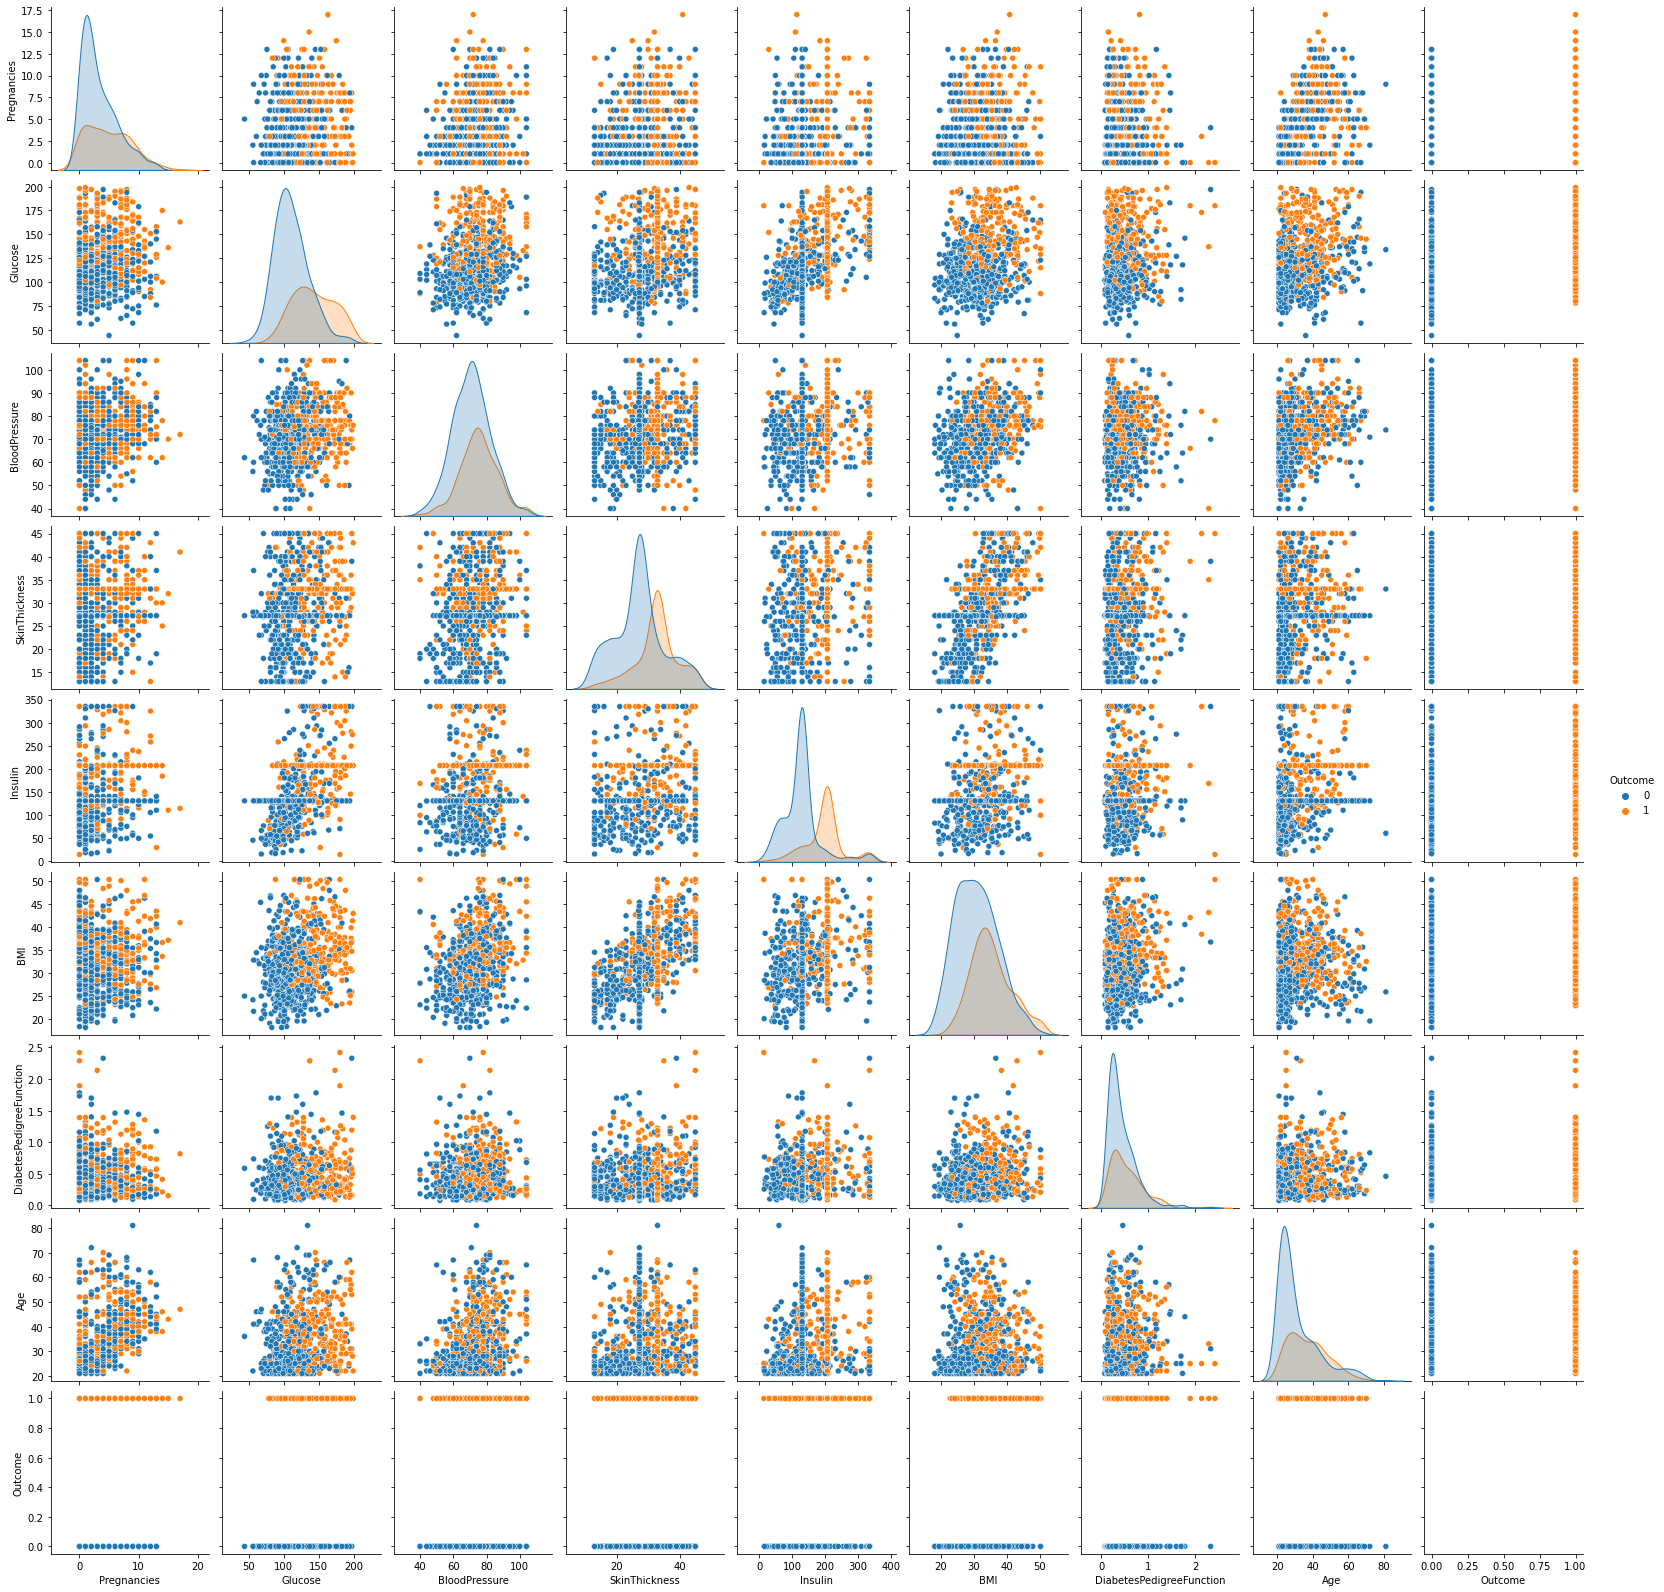

In [60]:
sns.pairplot(df, vars=df.columns, hue='Outcome', diag_kind="kde")

## There is a linear relationship between glucose and variables namely: BMI, BP, and insulin


In [61]:
df.corr(method='spearman')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.131837,0.187826,0.107578,0.167848,0.004036,-0.043242,0.607216,0.198689
Glucose,0.131837,1.000000,0.251491,0.259897,0.533345,0.230967,0.092037,0.285046,0.485179
BloodPressure,0.187826,0.251491,1.000000,0.226316,0.172210,0.298064,0.011060,0.366828,0.185579
SkinThickness,0.107578,0.259897,0.226316,1.000000,0.317548,0.577237,0.063280,0.203586,0.367459
Insulin,0.167848,0.533345,0.172210,0.317548,1.000000,0.271420,0.077557,0.262329,0.542089
BMI,0.004036,0.230967,0.298064,0.577237,0.271420,1.000000,0.133751,0.124123,0.311647
DiabetesPedigreeFunction,-0.043242,0.092037,0.011060,0.063280,0.077557,0.133751,1.000000,0.042909,0.175353
Age,0.607216,0.285046,0.366828,0.203586,0.262329,0.124123,0.042909,1.000000,0.309040
Outcome,0.198689,0.485179,0.185579,0.367459,0.542089,0.311647,0.175353,0.309040,1.000000


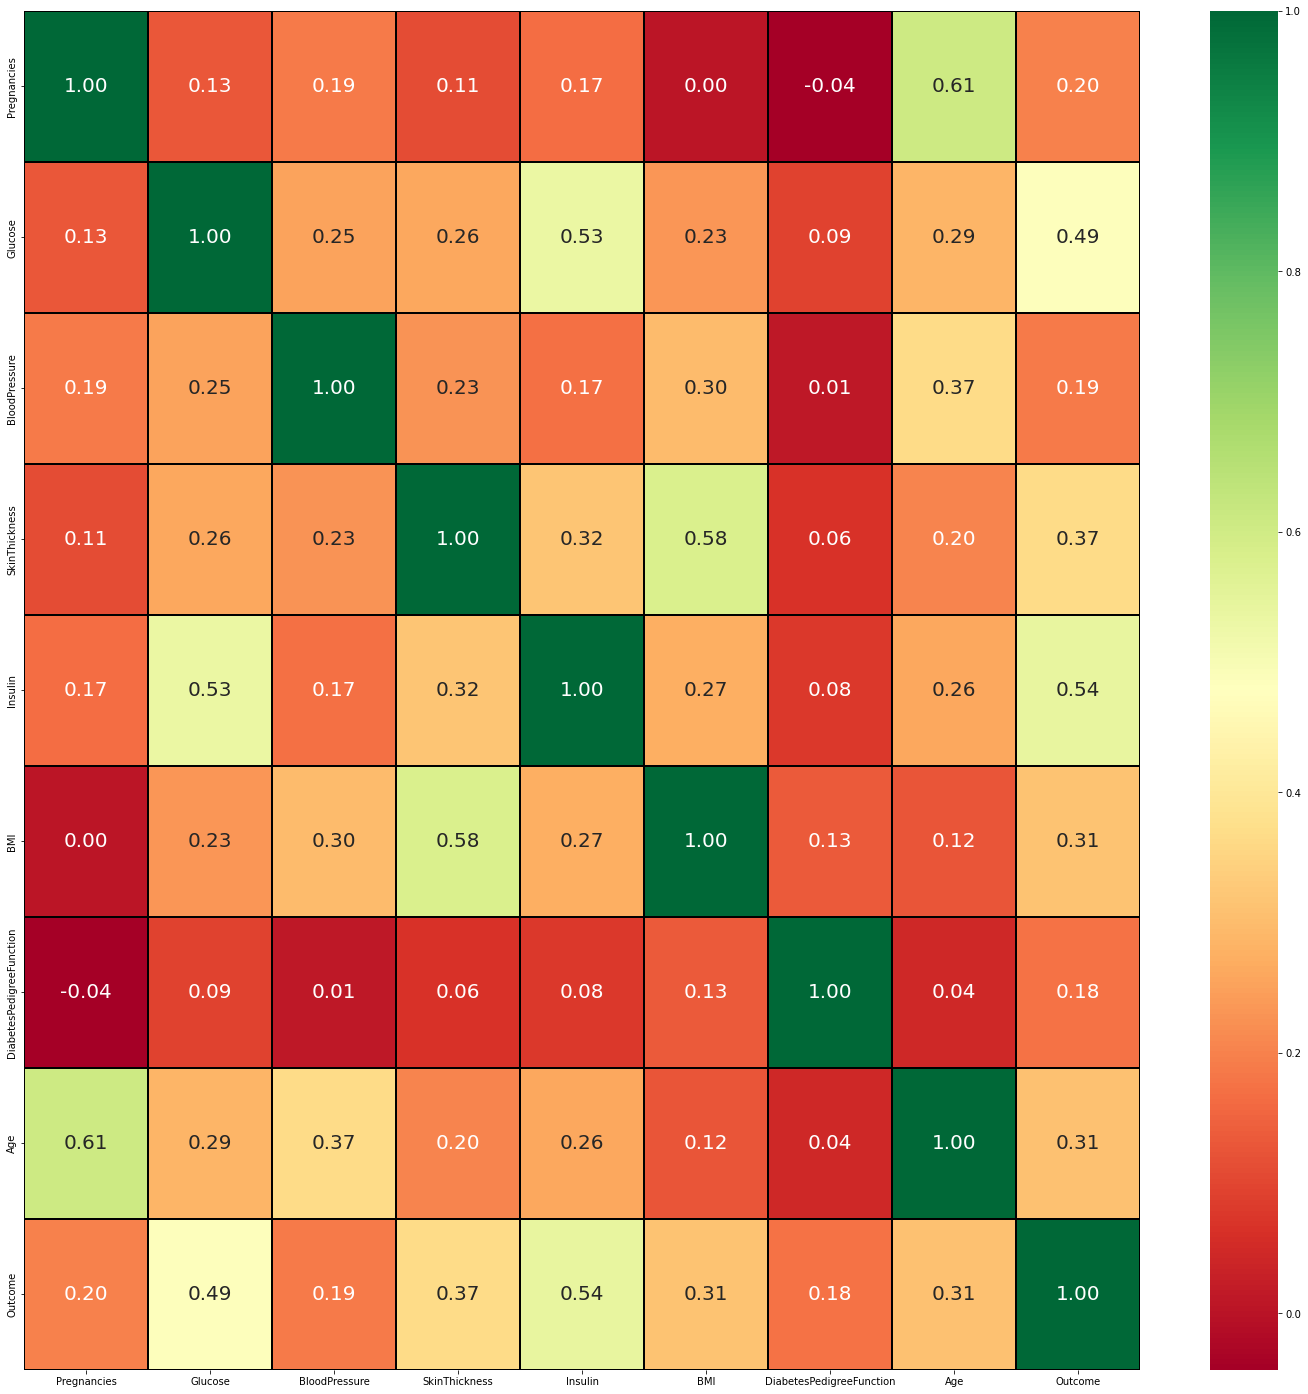

In [62]:
plt.figure(figsize = (25,25))
sns.heatmap(df.corr(method='spearman'),annot = True, annot_kws= {'size' : 20},
           cmap = "RdYlGn", fmt = '.2f', linewidths = 2, linecolor = 'black')
plt.show()

## The heatmap after tearting outliers shows that target variable is highly correlated with glucose, insulin, and moderately correlated skin thickness, BMI, and age

In [63]:
X = df.drop('Outcome',axis=1)
y = df['Outcome']
print(X)
print(y)

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0              6    148.0           72.0           35.0  206.846154  33.6   
1              1     85.0           66.0           29.0  130.287879  26.6   
2              8    183.0           64.0           33.0  206.846154  23.3   
3              1     89.0           66.0           23.0   94.000000  28.1   
4              0    137.0           40.0           35.0  168.000000  43.1   
..           ...      ...            ...            ...         ...   ...   
763           10    101.0           76.0           45.0  180.000000  32.9   
764            2    122.0           70.0           27.0  130.287879  36.8   
765            5    121.0           72.0           23.0  112.000000  26.2   
766            1    126.0           60.0           33.0  206.846154  30.1   
767            1     93.0           70.0           31.0  130.287879  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1

In [64]:
print(X.shape, y.shape)

(768, 8) (768,)


In [65]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, stratify=y, random_state=42)

In [67]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(512, 8) (256, 8) (512,) (256,)


In [68]:
scaler = StandardScaler()
#scaling only training features:
X_train_scaled=scaler.fit_transform(X_train)

In [69]:
X_test_scaled=scaler.transform(X_test)

In [70]:
df2 = pd.DataFrame(X_train)

In [71]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,512.0,3.871094,3.347310,0.000,1.00000,3.000000,6.000000,17.000000
Glucose,512.0,121.188686,30.171616,57.000,99.00000,116.000000,140.250000,198.000000
BloodPressure,512.0,72.322002,11.728425,40.000,64.00000,72.000000,80.000000,104.000000
SkinThickness,512.0,29.077005,7.825932,13.000,26.00000,28.000000,33.000000,45.000000
Insulin,512.0,148.457414,64.505678,16.000,121.50000,130.287879,206.846154,334.865385
BMI,512.0,32.573577,6.549965,18.200,27.87500,32.400000,36.500000,50.250000
DiabetesPedigreeFunction,512.0,0.478568,0.339071,0.084,0.24575,0.380000,0.629500,2.329000
Age,512.0,33.269531,11.562373,21.000,24.00000,29.000000,40.250000,81.000000


In [72]:
X_train_scaled

array([[-0.85857046, -0.03943603,  0.65528891, ...,  0.96681578,
         2.0175701 ,  0.66924232],
       [ 1.23470609, -1.56553883, -0.19817433, ...,  0.41665703,
         0.66845268,  0.49609827],
       [ 0.63662707,  0.42503005, -0.19817433, ...,  0.43193922,
         0.18725762, -0.36962196],
       ...,
       [ 2.43086411, -0.96836817, -0.88094493, ..., -0.76007141,
         1.32087051,  0.92895838],
       [-1.15760996,  1.91795671, -1.90510082, ...,  0.79871172,
        -0.06957655, -0.97562612],
       [ 0.03854806,  0.75679153, -1.22233023, ..., -0.46970985,
        -0.56553219,  0.32295423]])

In [73]:
#model1
def buildModel(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    Training_Accuracy_Score = round(accuracy_score(y_train, train_pred),2)
    Testing_Accuracy_Score = round(accuracy_score(y_test, test_pred),2)
    Confusion_Matrix = confusion_matrix(y_test, test_pred)
    Classification_Report = classification_report(y_test, test_pred)
    return Training_Accuracy_Score, Testing_Accuracy_Score, Confusion_Matrix, Classification_Report, test_pred

In [74]:
def plot_roc_auc(model,X_test):
    logit_roc_auc=roc_auc_score(y_test,model.predict(X_test))
    fpr,tpr,thresholds=roc_curve(y_test,model.predict_proba(X_test)[:,1])
    print('Accuracy of ROC curve',round(logit_roc_auc*100),'%')
    print()
    plt.figure()
    plt.plot(fpr,tpr)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0,1.05])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive Rate')
    plt.title('Receiver Operating Curve(ROC)')
    plt.show()

In [75]:
def plotCM(conf_matrix):
    ConfusionMatrixDisplay(conf_matrix,display_labels=['no Diabetics','Diabetics']).plot()
    plt.show()

In [76]:
train_score=[]
test_score=[]
model_name=[]

In [77]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(512, 8) (512,) (256, 8) (256,)


# Logistic Regression

Training Accuracy:- 0.84
Testing Accuracy:- 0.81


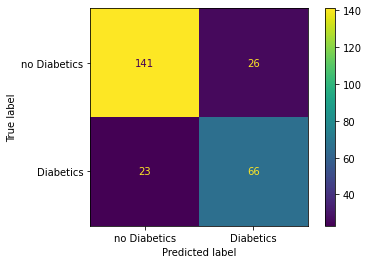


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.86      0.84      0.85       167
           1       0.72      0.74      0.73        89

    accuracy                           0.81       256
   macro avg       0.79      0.79      0.79       256
weighted avg       0.81      0.81      0.81       256

Accuracy of ROC curve 79 %



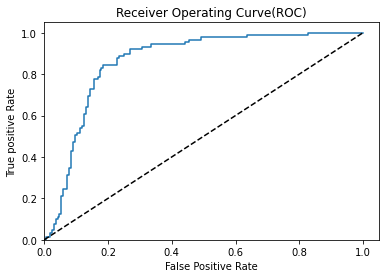

In [78]:
lr=LogisticRegression()
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(lr,X_train_scaled,y_train,X_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
plot_roc_auc(lr,X_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('LR')

# KNN

Training Accuracy:- 0.87
Testing Accuracy:- 0.82
[0 1]


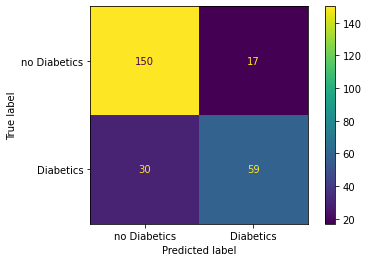


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       167
           1       0.78      0.66      0.72        89

    accuracy                           0.82       256
   macro avg       0.80      0.78      0.79       256
weighted avg       0.81      0.82      0.81       256

Accuracy of ROC curve 78 %



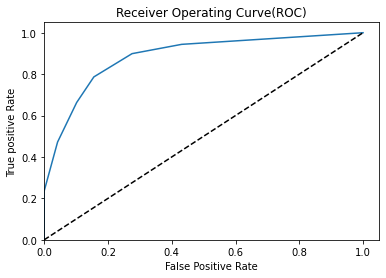

In [79]:
kn=KNeighborsClassifier(n_neighbors=6)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(kn,X_train_scaled, y_train, X_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(kn.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
plot_roc_auc(kn,X_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('KNN')

# SVM

Training Accuracy:- 0.85
Testing Accuracy:- 0.86
[0 1]


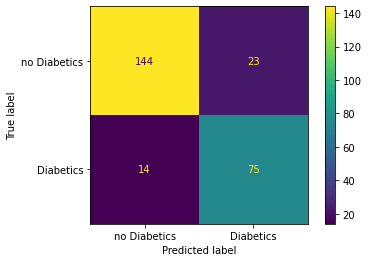


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.91      0.86      0.89       167
           1       0.77      0.84      0.80        89

    accuracy                           0.86       256
   macro avg       0.84      0.85      0.84       256
weighted avg       0.86      0.86      0.86       256

Accuracy of ROC curve 85 %



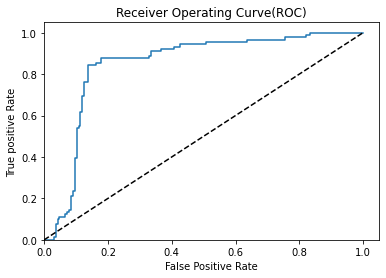

In [92]:
svc=SVC(kernel='linear', probability=True)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(svc,X_train_scaled,y_train,X_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(svc.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
plot_roc_auc(svc,X_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('SVC')

# Decision Tree

In [81]:
from sklearn.model_selection import GridSearchCV
DT=DecisionTreeClassifier()
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_scaled,y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2}
Best score:  0.8613744526936988


Training Accuracy:- 0.93
Testing Accuracy:- 0.79
[0 1]


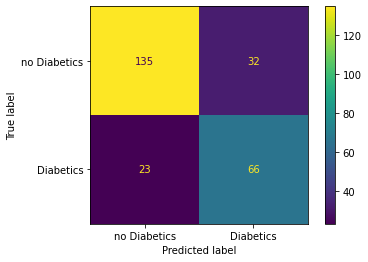


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       167
           1       0.67      0.74      0.71        89

    accuracy                           0.79       256
   macro avg       0.76      0.77      0.77       256
weighted avg       0.79      0.79      0.79       256

Accuracy of ROC curve 77 %



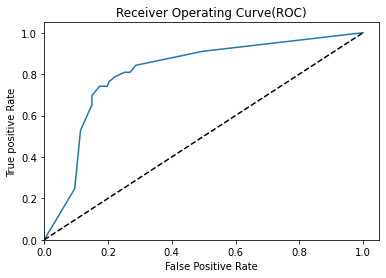

In [93]:
dt=DecisionTreeClassifier(max_depth= 6, max_features= 'log2', min_samples_leaf= 2, min_samples_split= 2)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(dt,X_train_scaled,y_train,X_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(dt.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
plot_roc_auc(dt,X_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('DT')

# Random Forest

In [83]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
param_grid = {
    'max_depth': [2, 4, 6],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 3],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create a grid search object
grid_search = GridSearchCV(DT, param_grid=param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_train_scaled,y_train)

# Print the best hyperparameters and the corresponding mean cross-validation score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'max_depth': 4, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 6}
Best score:  0.8750047591852276


Training Accuracy:- 0.91
Testing Accuracy:- 0.87
[0 1]


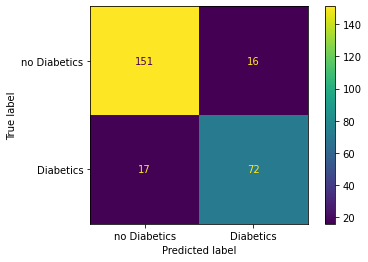


-------------------------Classification Report----------------------------------------

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       167
           1       0.82      0.81      0.81        89

    accuracy                           0.87       256
   macro avg       0.86      0.86      0.86       256
weighted avg       0.87      0.87      0.87       256

Accuracy of ROC curve 86 %



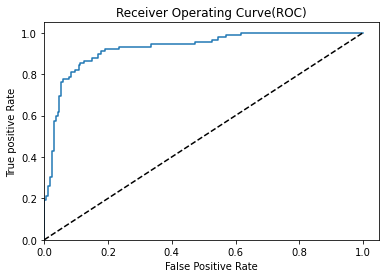

In [94]:
rf=RandomForestClassifier(max_depth= 4, max_features='auto', min_samples_leaf=1, min_samples_split= 4)
train_accuracy,test_accuracy,confusion_Matrix,classification_Report,test_pred=buildModel(rf,X_train_scaled,y_train,X_test_scaled,y_test)
print('Training Accuracy:-',train_accuracy)
print('Testing Accuracy:-',test_accuracy)
print(rf.classes_)
plotCM(confusion_Matrix)
print()
print('-------------------------Classification Report----------------------------------------')
print()
print(classification_Report)
plot_roc_auc(rf,X_test_scaled)
train_score.append(train_accuracy)
test_score.append(test_accuracy)
model_name.append('RF')

# Model Comparison

<Figure size 1440x720 with 0 Axes>

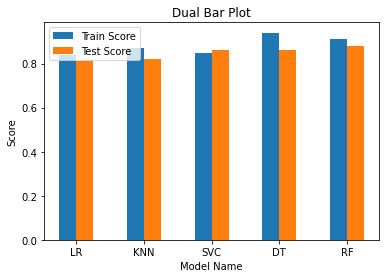

In [85]:
bar_width = 0.25
x = np.arange(len(model_name))

plt.figure(figsize=(20,10))
# Create the figure and axis objects
fig, ax = plt.subplots()

# Create the bars for data set 1
ax.bar(x - bar_width/2,train_score, bar_width, label='Train Score')

# Create the bars for data set 2
ax.bar(x + bar_width/2, test_score, bar_width, label='Test Score')

# Add x-axis ticks and labels
ax.set_xticks(x)
ax.set_xticklabels(model_name)

# Add labels and title
ax.set_xlabel('Model Name')
ax.set_ylabel('Score')
ax.set_title('Dual Bar Plot')

# Add a legend
ax.legend()

# Display the chart
plt.show()



## Out of all the models SVM is peforming best fitting model with Training/testing accuracy of 85/86 and least misclassified cases of 37.

In [86]:
mapping={0:'non diabetic',1:'diabetic'}
df['Diabetic status']=df['Outcome'].map(mapping)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Diabetic status
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,diabetic
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,non diabetic
2,8,183.0,64.0,33.0,206.846154,23.3,0.672,32,1,diabetic
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21,0,non diabetic
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33,1,diabetic


In [87]:
bins = [20,25,30,35,40,45,50,55,60,65,70,75,80,85]
category = ['20-25', '25-30', '30-35', '35-40', '40-45', '45-50', '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85']
df_cleaned['Age_category'] = pd.cut(df_cleaned['Age'], bins, labels= category)

In [88]:
df_cleaned.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Age_category
0,6,148.0,72.0,35.0,206.846154,33.6,0.627,50,1,45-50
1,1,85.0,66.0,29.0,130.287879,26.6,0.351,31,0,30-35


In [89]:
df_cleaned.to_excel('output2.xlsx',sheet_name='Diabetic Data2',index=False)